In [1]:
# ! pip install ydata-profiling

In [2]:
# !pip install yfinance

In [3]:
# pip install spacy


In [4]:
from spacy.lang.en import English

In [5]:
# SentAnalysis imports
import warnings
warnings.filterwarnings('ignore')
import re
import datetime
from nltk import word_tokenize, corpus
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer

In [6]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from collections import Counter
import plotly.express as px

import string
import spacy
from collections import defaultdict

import re
import string
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
nlp = English() 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lalep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lalep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lalep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
current_directory = os.getcwd()
print(current_directory)

C:\Users\lalep


In [9]:
path = 'C:/Users/lalep/OneDrive - Queen\'s University/Documents/Queens University/MMAI 823 - AI in Finance/Final Project'

# Set the current directory to the specified path
os.chdir(path)

# Verify the current directory has been changed
current_directory = os.getcwd()
print(current_directory)


C:\Users\lalep\OneDrive - Queen's University\Documents\Queens University\MMAI 823 - AI in Finance\Final Project


In [10]:
data = pd.read_csv('reddit_wsb.csv')

In [11]:
# data.dataframeName = 'reddit_wsb.csv'

# EDA

* title: the title of the link. may contain newlines for some reason
* score:the net-score of the link. note: A submission's score is simply the number of upvotes minus the number of downvotes. If five users like the submission and three users don't it will have a score of 2. Please note that the vote numbers are not "real" numbers, they have been "fuzzed" to prevent spam bots etc. So taking the above example, if five users upvoted the submission, and three users downvote it, the upvote/downvote numbers may say 23 upvotes and 21 downvotes, or 12 upvotes, and 10 downvotes. The points score is correct, but the vote totals are "fuzzed".
* id: this item's identifier, e.g. "8xwlg"
* url: the link of this post. the permalink if this is a self-post
* comms_num: the number of comments that belong to this link. includes removed comments.
* created: the time of creation in local epoch-second format
* body: the raw text. this is the unformatted text which includes the raw markup characters such as ** for bold. <, >, and & are escaped.
* timestamp: datetime about the related activity

In [12]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 53187 rows and 8 columns


In [13]:
data.head()

title  score      id  \
0  It's not about the money, it's about sending a...     55  l6ulcx   
1  Math Professor Scott Steiner says the numbers ...    110  l6uibd   
2                                    Exit the system      0  l6uhhn   
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...     29  l6ugk6   
4  Not to distract from GME, just thought our AMC...     71  l6ufgy   

                                                 url  comms_num       created  \
0                    https://v.redd.it/6j75regs72e61          6  1.611863e+09   
1                    https://v.redd.it/ah50lyny62e61         23  1.611862e+09   
2  https://www.reddit.com/r/wallstreetbets/commen...         47  1.611862e+09   
3  https://sec.report/Document/0001193125-21-019848/         74  1.611862e+09   
4                https://i.redd.it/4h2sukb662e61.jpg        156  1.611862e+09   

                                                body            timestamp  
0                                                NaN  2021-01-28 21:37:41  
1                                                NaN  2021-01-28 21:32:10  
2  The CEO of NASDAQ pushed to halt trading “to g...  2021-01-28 21:30:35  
3                                                NaN  2021-01-28 21:28:57  
4                                                NaN  2021-01-28 21:26:56

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53187 entries, 0 to 53186
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      53187 non-null  object 
 1   score      53187 non-null  int64  
 2   id         53187 non-null  object 
 3   url        53187 non-null  object 
 4   comms_num  53187 non-null  int64  
 5   created    53187 non-null  float64
 6   body       24738 non-null  object 
 7   timestamp  53187 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


In [15]:
# Convert 'timestamp' column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [16]:
# Filter the DataFrame for entries from 2020
df_2020 = data[data['timestamp'].dt.year == 2020]

In [17]:
df_2020.head()

title  score      id  \
32591  $CBAT $SUNW $SPI $OXBR Y'all are missing the p...      4  j1fmmo   

                                                     url  comms_num  \
32591  https://www.reddit.com/r/wallstreetbets/commen...         11   

            created                                               body  \
32591  1.601340e+09  $CBAT is going to be a great play further yet:...   

                timestamp  
32591 2020-09-29 03:46:56

There is only one entry for the year of 2020, so we will remove that one.

In [18]:
data = data[data['timestamp'].dt.year != 2020]

In [19]:
# Find the minimum and maximum values of the "timestamp" column
min_timestamp = data['timestamp'].min()
max_timestamp = data['timestamp'].max()

# Print the results
print("Minimum Timestamp:", min_timestamp)
print("Maximum Timestamp:", max_timestamp)

Minimum Timestamp: 2021-01-28 09:08:16
Maximum Timestamp: 2021-08-16 09:26:20


In [20]:
# profile = pp.ProfileReport(data, title = "WSB Exploration")

In [21]:
# profile.to_notebook_iframe()

In [22]:
# profile.to_file("output.html")

In [23]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "fuck", "fucking"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

In [24]:
# show_wordcloud(data['title'], title = 'Prevalent words in titles')

In [25]:
# show_wordcloud(data['body'], title = 'Prevalent words in post bodies')

In [26]:
data['text'] = data['title'] + ' ' + data['body'].fillna('')

In [27]:
data.head()

title  score      id  \
0  It's not about the money, it's about sending a...     55  l6ulcx   
1  Math Professor Scott Steiner says the numbers ...    110  l6uibd   
2                                    Exit the system      0  l6uhhn   
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...     29  l6ugk6   
4  Not to distract from GME, just thought our AMC...     71  l6ufgy   

                                                 url  comms_num       created  \
0                    https://v.redd.it/6j75regs72e61          6  1.611863e+09   
1                    https://v.redd.it/ah50lyny62e61         23  1.611862e+09   
2  https://www.reddit.com/r/wallstreetbets/commen...         47  1.611862e+09   
3  https://sec.report/Document/0001193125-21-019848/         74  1.611862e+09   
4                https://i.redd.it/4h2sukb662e61.jpg        156  1.611862e+09   

                                                body           timestamp  \
0                                                NaN 2021-01-28 21:37:41   
1                                                NaN 2021-01-28 21:32:10   
2  The CEO of NASDAQ pushed to halt trading “to g... 2021-01-28 21:30:35   
3                                                NaN 2021-01-28 21:28:57   
4                                                NaN 2021-01-28 21:26:56   

                                                text  
0  It's not about the money, it's about sending a...  
1  Math Professor Scott Steiner says the numbers ...  
2  Exit the system The CEO of NASDAQ pushed to ha...  
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...  
4  Not to distract from GME, just thought our AMC...

In [28]:
df=data.copy()

In [29]:
df = df.drop(['title', 'body', 'url', 'created'], axis=1)

In [30]:
df['original_text'] = df['text']

In [31]:
df.head()

score      id  comms_num           timestamp  \
0     55  l6ulcx          6 2021-01-28 21:37:41   
1    110  l6uibd         23 2021-01-28 21:32:10   
2      0  l6uhhn         47 2021-01-28 21:30:35   
3     29  l6ugk6         74 2021-01-28 21:28:57   
4     71  l6ufgy        156 2021-01-28 21:26:56   

                                                text  \
0  It's not about the money, it's about sending a...   
1  Math Professor Scott Steiner says the numbers ...   
2  Exit the system The CEO of NASDAQ pushed to ha...   
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...   
4  Not to distract from GME, just thought our AMC...   

                                       original_text  
0  It's not about the money, it's about sending a...  
1  Math Professor Scott Steiner says the numbers ...  
2  Exit the system The CEO of NASDAQ pushed to ha...  
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...  
4  Not to distract from GME, just thought our AMC...

In [32]:
df.shape

(53186, 6)

# Text Preprocessing

In [33]:
other_chars = ['*', '#', '&x200B', '[', ']', '; ',' ;' "&nbsp", "“","“","”", "x200b"]

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stop_words(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop])

def lemmatize_words(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

remove_spaces = lambda x : re.sub('\\s+', ' ', x)

def lower_case_text(text):
    return text.lower()

def remove_numbers(text):
    # Use regular expressions to remove numbers
    text_without_numbers = re.sub(r'\d+', '', text)
    return text_without_numbers

def remove_other_chars(x: str):
    for char in other_chars:
        x = x.replace(char, '')
    
    return x


# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [34]:
remove_double_quotes = lambda x : x.replace('"', '')
remove_single_quotes = lambda x : x.replace('\'', '')
trim = lambda x : x.strip()

In [35]:
funcs = [
    remove_urls, 
    remove_punctuation,
    remove_stop_words, 
#     remove_emoji, 
    remove_double_quotes, 
    remove_single_quotes,
    lower_case_text,
    remove_other_chars,
    remove_numbers,
#     lemmatize_words,  # removed the entire text
    remove_spaces,
    trim
]

for fun in funcs:
    df['text'] = df['text'].apply(fun)


In [36]:
#remove all single characters
df.text = df.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

In [37]:
df.head()

score      id  comms_num           timestamp  \
0     55  l6ulcx          6 2021-01-28 21:37:41   
1    110  l6uibd         23 2021-01-28 21:32:10   
2      0  l6uhhn         47 2021-01-28 21:30:35   
3     29  l6ugk6         74 2021-01-28 21:28:57   
4     71  l6ufgy        156 2021-01-28 21:26:56   

                                                text  \
0                        money sending message 🚀 💎 🙌   
1  math professor scott steiner says numbers spel...   
2  exit system ceo nasdaq pushed halt trading inv...   
3              new sec filing gme retarded interpret   
4            distract gme thought amc brothers aware   

                                       original_text  
0  It's not about the money, it's about sending a...  
1  Math Professor Scott Steiner says the numbers ...  
2  Exit the system The CEO of NASDAQ pushed to ha...  
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...  
4  Not to distract from GME, just thought our AMC...

## Data visualization

In [38]:
data_text = df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in data_text for item in sublist])
temp = pd.DataFrame(top.most_common(50))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [39]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

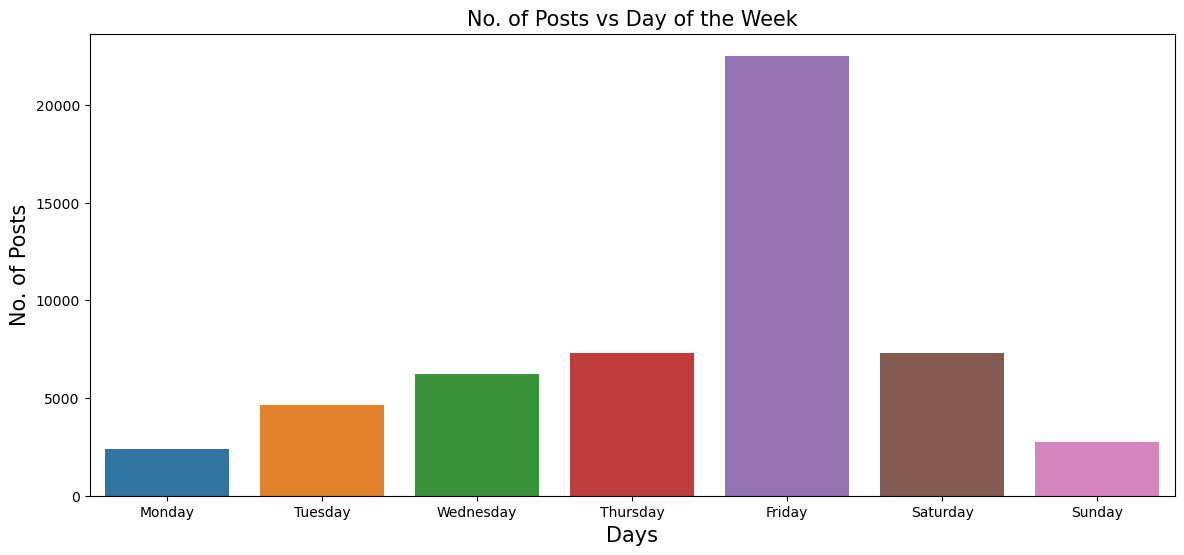

In [40]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

day_of_the_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
days_order = list(day_of_the_week.values())

df['Weekday'] = df['timestamp'].apply(lambda x : day_of_the_week[x.weekday()])

xs = df['Weekday'].value_counts().index
ys = df['Weekday'].value_counts().values

plt.figure(figsize=(14,6))

sns.barplot(x=xs, y=ys, order=days_order)

plt.title("No. of Posts vs Day of the Week", fontsize=15)

plt.xlabel("Days", fontsize=15)
plt.ylabel("No. of Posts", fontsize=15)

plt.show()

# Sentiment Analysis

In [41]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [42]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lalep\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
sia = SentimentIntensityAnalyzer()  

In [44]:
sia = SentimentIntensityAnalyzer()  
# sentiment=vad()
# Making additional columns for sentiment score in the vader dataframe
sen=['Positive','Negative','Neutral']
sentiments=[sia.polarity_scores(i) for i in df['text'].values]
df['negative_score']=[i['neg'] for i in sentiments]
df['positive_score']=[i['pos'] for i in sentiments]
df['neutral_score']=[i['neu'] for i in sentiments]
df['compound_score']=[i['compound'] for i in sentiments]
score=df['compound_score'].values
t=[]
for i in score:
    if i >=0.05 :
        t.append('Positive')
    elif i<=-0.05 :
        t.append('Negative')
    else:
        t.append('Neutral')
df['overall_sentiment']=t

In [45]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

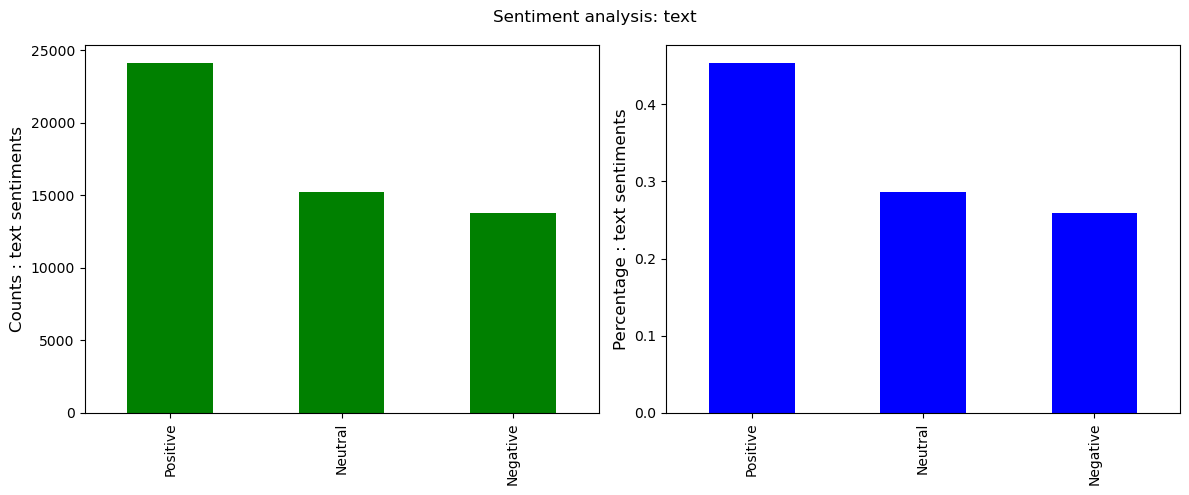

In [46]:
plot_sentiment(df, 'overall_sentiment', 'text')

In [47]:
df.head()

score      id  comms_num           timestamp  \
0     55  l6ulcx          6 2021-01-28 21:37:41   
1    110  l6uibd         23 2021-01-28 21:32:10   
2      0  l6uhhn         47 2021-01-28 21:30:35   
3     29  l6ugk6         74 2021-01-28 21:28:57   
4     71  l6ufgy        156 2021-01-28 21:26:56   

                                                text  \
0                        money sending message 🚀 💎 🙌   
1  math professor scott steiner says numbers spel...   
2  exit system ceo nasdaq pushed halt trading inv...   
3              new sec filing gme retarded interpret   
4            distract gme thought amc brothers aware   

                                       original_text   Weekday  \
0  It's not about the money, it's about sending a...  Thursday   
1  Math Professor Scott Steiner says the numbers ...  Thursday   
2  Exit the system The CEO of NASDAQ pushed to ha...  Thursday   
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...  Thursday   
4  Not to distract from GME, just thought our AMC...  Thursday   

   negative_score  positive_score  neutral_score  compound_score  \
0           0.000           0.000          1.000          0.0000   
1           0.313           0.000          0.687         -0.6249   
2           0.112           0.125          0.763          0.3400   
3           0.425           0.000          0.575         -0.5719   
4           0.306           0.000          0.694         -0.2960   

  overall_sentiment  
0           Neutral  
1          Negative  
2          Positive  
3          Negative  
4          Negative

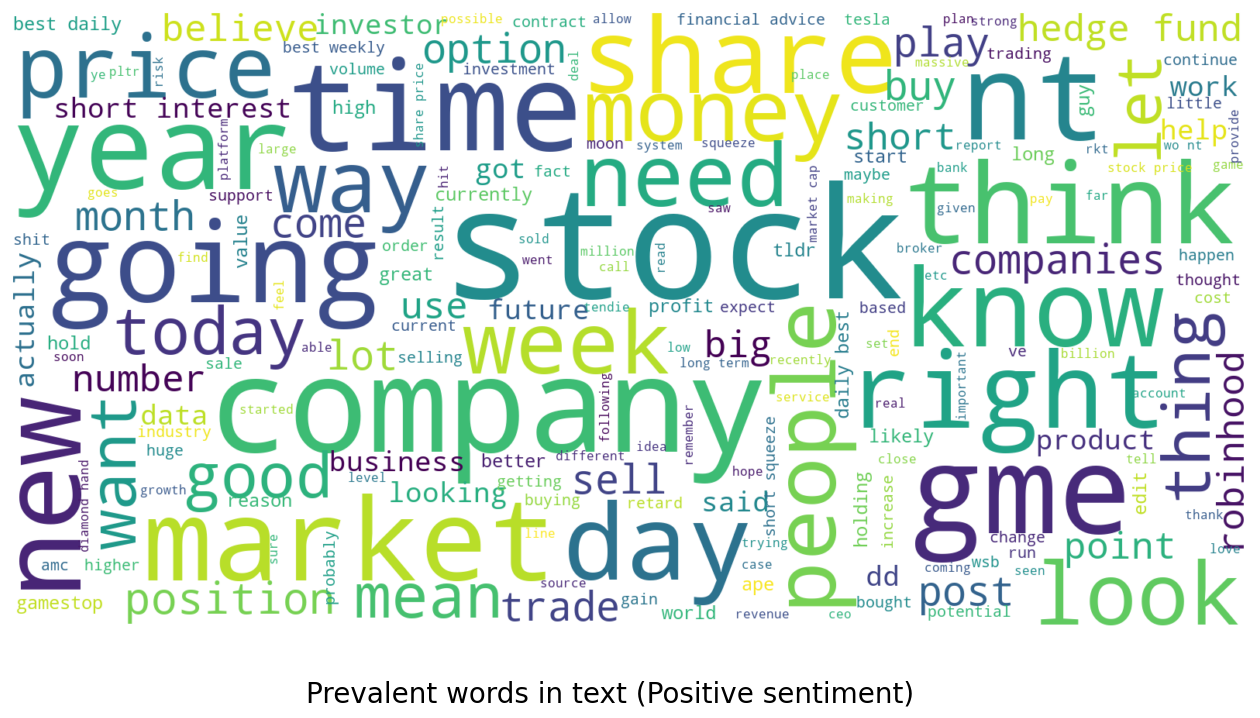

In [48]:
show_wordcloud(df.loc[df['overall_sentiment']=='Positive', 'text'], title = 'Prevalent words in text (Positive sentiment)')

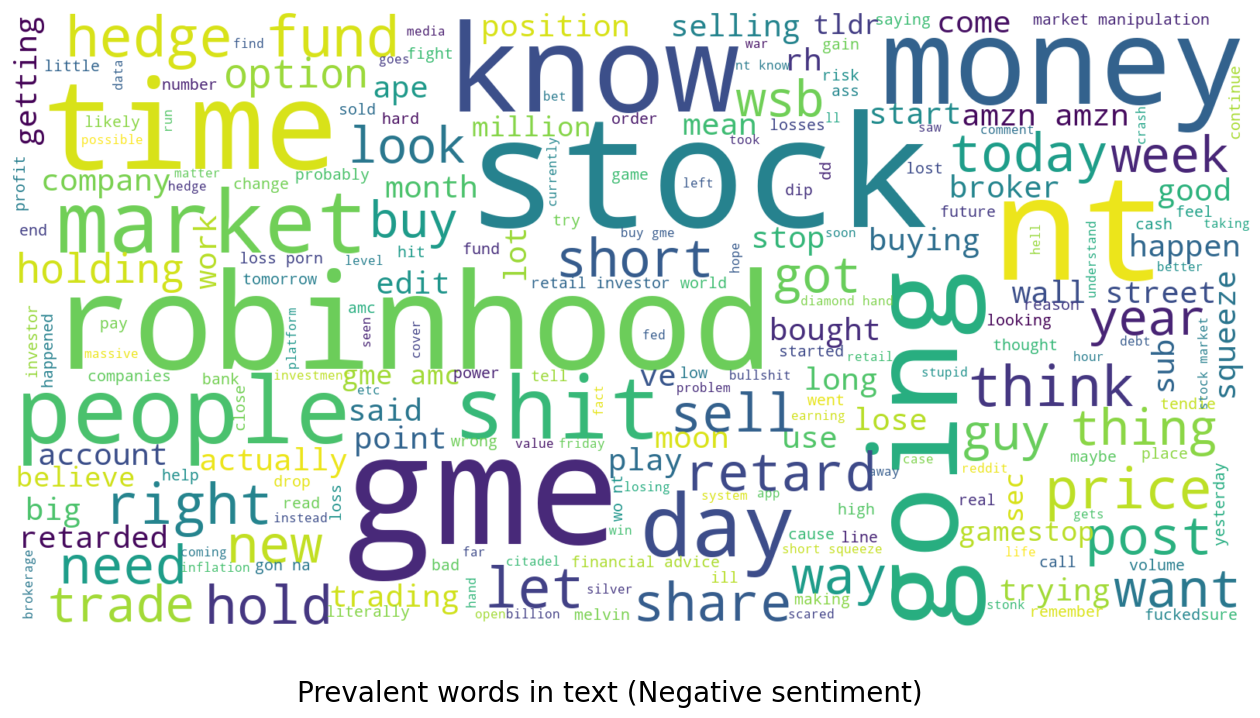

In [49]:
show_wordcloud(df.loc[df['overall_sentiment']=='Negative', 'text'], title = 'Prevalent words in text (Negative sentiment)')

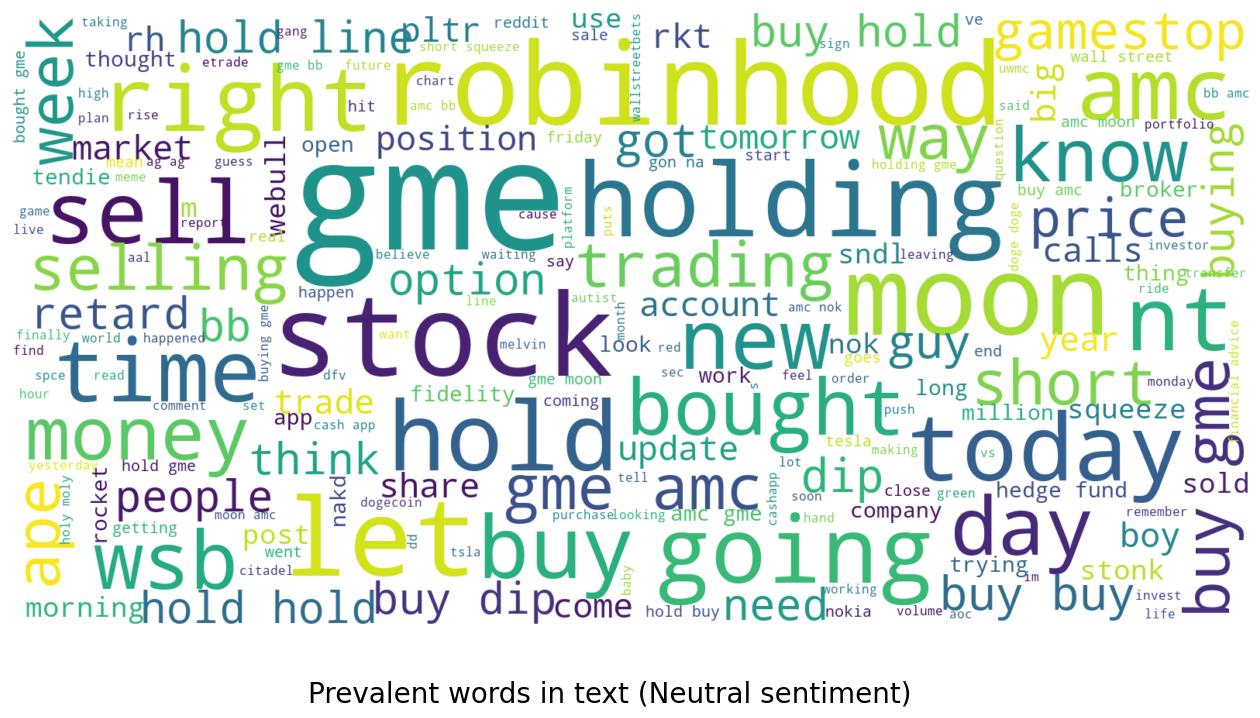

In [50]:
show_wordcloud(df.loc[df['overall_sentiment']=='Neutral', 'text'], title = 'Prevalent words in text (Neutral sentiment)')

In [51]:
fig=px.histogram(data_frame=df,x='compound_score',color='overall_sentiment',template='plotly')
fig.show()

In [52]:
def find_sentiment_polarity_textblob(post):
    blob = TextBlob(post)
    polarity = 0
    for sentence in blob.sentences:
        polarity += sentence.sentiment.polarity
    return polarity

def find_sentiment_subjectivity_textblob(post):
    blob = TextBlob(post)
    subjectivity = 0
    for sentence in blob.sentences:
        subjectivity += sentence.sentiment.subjectivity
    return subjectivity

In [53]:
# pip install TextBlob

In [54]:
from textblob import TextBlob
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lalep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
df['text_sentiment_polarity'] = df['text'].apply(lambda x: find_sentiment_polarity_textblob(x))
df['text_sentiment_subjectivity'] = df['text'].apply(lambda x: find_sentiment_subjectivity_textblob(x))

In [56]:
def plot_sentiment_textblob(df, feature, title):
    polarity = df[feature+'_sentiment_polarity']
    subjectivity = df[feature+'_sentiment_subjectivity']

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    polarity.plot(kind='kde', ax=ax1, color='magenta')
    subjectivity.plot(kind='kde', ax=ax2, color='green')
    ax1.set_ylabel(f'Sentiment polarity : {title}', size=12)
    ax2.set_ylabel(f'Sentiment subjectivity: {title}', size=12)
    plt.suptitle(f"Sentiment analysis (polarity & subjectivity): {title}")
    plt.tight_layout()
    plt.show()

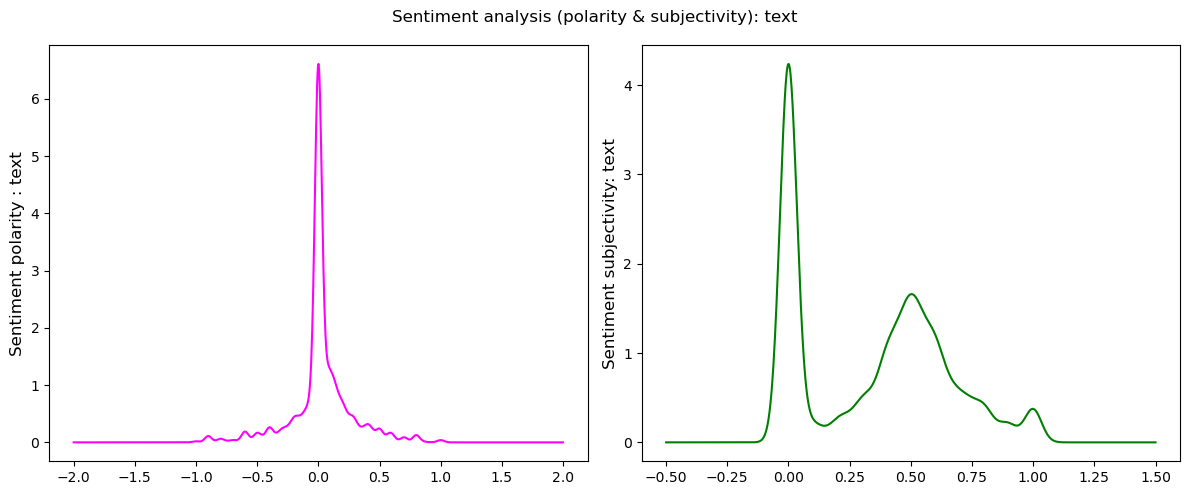

In [57]:
plot_sentiment_textblob(df, "text", 'text')

In [58]:
df.head()

score      id  comms_num           timestamp  \
0     55  l6ulcx          6 2021-01-28 21:37:41   
1    110  l6uibd         23 2021-01-28 21:32:10   
2      0  l6uhhn         47 2021-01-28 21:30:35   
3     29  l6ugk6         74 2021-01-28 21:28:57   
4     71  l6ufgy        156 2021-01-28 21:26:56   

                                                text  \
0                        money sending message 🚀 💎 🙌   
1  math professor scott steiner says numbers spel...   
2  exit system ceo nasdaq pushed halt trading inv...   
3              new sec filing gme retarded interpret   
4            distract gme thought amc brothers aware   

                                       original_text   Weekday  \
0  It's not about the money, it's about sending a...  Thursday   
1  Math Professor Scott Steiner says the numbers ...  Thursday   
2  Exit the system The CEO of NASDAQ pushed to ha...  Thursday   
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...  Thursday   
4  Not to distract from GME, just thought our AMC...  Thursday   

   negative_score  positive_score  neutral_score  compound_score  \
0           0.000           0.000          1.000          0.0000   
1           0.313           0.000          0.687         -0.6249   
2           0.112           0.125          0.763          0.3400   
3           0.425           0.000          0.575         -0.5719   
4           0.306           0.000          0.694         -0.2960   

  overall_sentiment  text_sentiment_polarity  text_sentiment_subjectivity  
0           Neutral                 0.000000                     0.000000  
1          Negative                 0.000000                     0.000000  
2          Positive                -0.000923                     0.389370  
3          Negative                -0.254545                     0.618182  
4          Negative                 0.250000                     0.250000

In [59]:
df.to_csv('output.csv', index=False)
